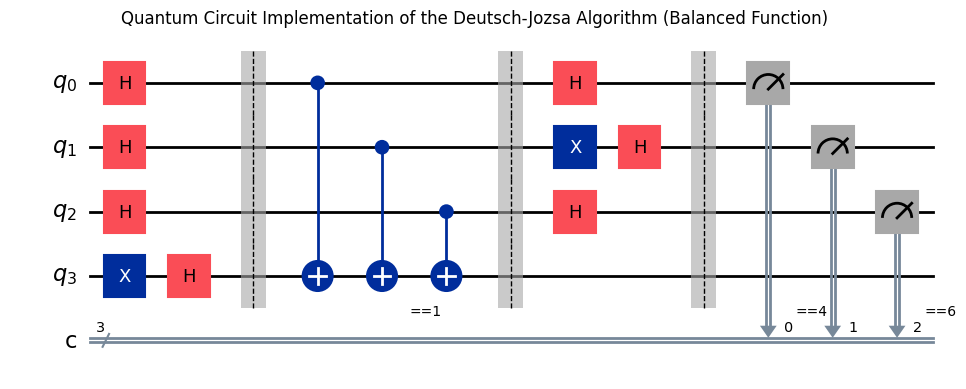

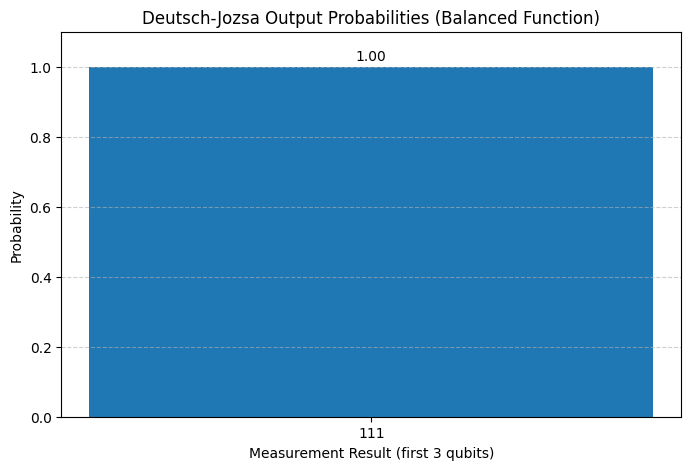

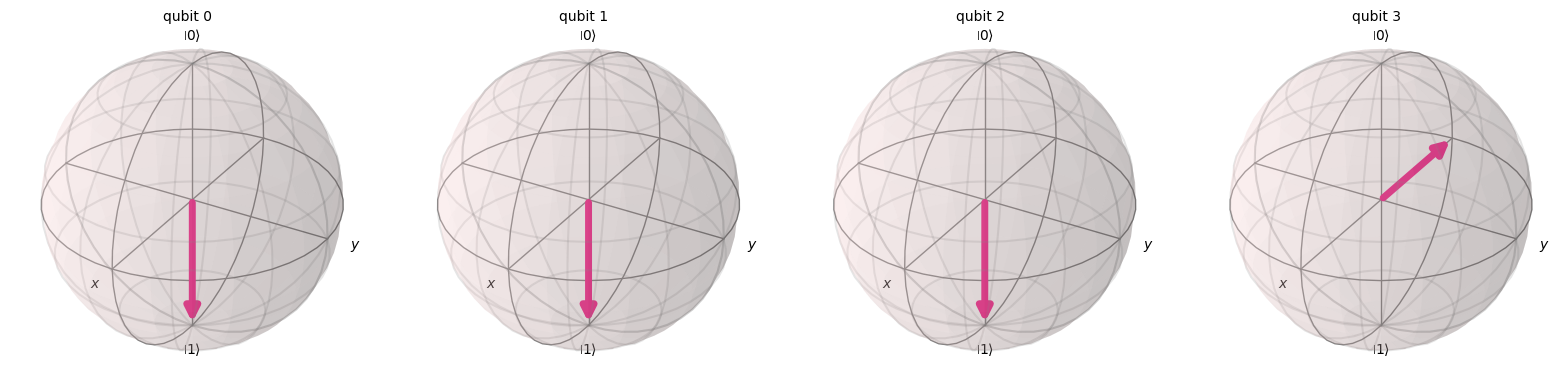

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit qiskit-aer matplotlib

# %matplotlib inline is for Jupyter/Colab
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from IPython.display import display,HTML


#Create quantum and classical registers
qreg = QuantumRegister(4, 'q')       # 3 input qubits + 1 auxiliary qubit
creg = ClassicalRegister(3, 'c')     # Only measure first 3 qubits
qc = QuantumCircuit(qreg, creg)

#Initialization
qc.h(qreg[0])
qc.h(qreg[1])
qc.h(qreg[2])
qc.x(qreg[3])
qc.h(qreg[3])

#Oracle - simulate a balanced function
qc.barrier()
qc.cx(qreg[0], qreg[3])
qc.cx(qreg[1], qreg[3])
qc.cx(qreg[2], qreg[3])
qc.barrier()

#Post-oracle transformations
qc.h(qreg[0])
qc.x(qreg[1])
qc.h(qreg[1])
qc.h(qreg[2])
qc.barrier()

# Step 5: Measurement of first 3 qubits
qc.measure(qreg[0], creg[0])
qc.measure(qreg[1], creg[1])
qc.measure(qreg[2], creg[2])

#Draw the circuit
# Generate circuit diagram as a matplotlib figure
fig = circuit_drawer(qc, output='mpl', justify='left', idle_wires=False)

# Add annotations to the same figure
ax = fig.axes[0]  # Get the axis object

# Add text at specified (x, y) positions
ax.text(4.2, -3.6, '==1', fontsize=10, color='black')
ax.text(10.2, -3.6, '==4', fontsize=10, color='black')
ax.text(12.2, -3.6, '==6', fontsize=10, color='black')

# Add a title
ax.set_title("Quantum Circuit Implementation of the Deutsch-Jozsa Algorithm (Balanced Function)")

# Show the updated plot
display(fig)
display(HTML("<div style='margin-top: 40px;'></div>"))


#Run simulation (measurement)
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

#Calculate probabilities
total_shots = sum(counts.values())
probs = {key: round(value / total_shots, 4) for key, value in counts.items()}

#Custom histogram with annotated probabilities
fig = plt.figure(figsize=(8, 5))
bars = plt.bar(probs.keys(), probs.values())
plt.title("Deutsch-Jozsa Output Probabilities (Balanced Function)")
plt.xlabel("Measurement Result (first 3 qubits)")
plt.ylabel("Probability")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#Bloch Sphere Visualization (pure quantum circuit)
state_qc = QuantumCircuit(4)
state_qc.h(0)
state_qc.h(1)
state_qc.h(2)
state_qc.x(3)
state_qc.h(3)
state_qc.cx(0, 3)
state_qc.cx(1, 3)
state_qc.cx(2, 3)
state_qc.h(0)
state_qc.x(1)
state_qc.h(1)
state_qc.h(2)

#To save the statevector result
state_qc.save_statevector()

# Simulate statevector
state_sim = AerSimulator(method='statevector')
state_result = state_sim.run(state_qc).result()
statevector = state_result.get_statevector()

# Plot Bloch spheres of all qubits
display(plot_bloch_multivector(statevector))
